In [1]:
# Description: This program uses Convolutional Neural Networks (CNN) 
#              to classify handwritten digits as numbers 0 - 9

#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
#Load the data and split it into train and test sets
(X_train,y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [3]:
#Get the image shape
print(X_train.shape)#60000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)
print(X_test.shape)#10000 rows of 28x28 pixel images with a depth=1 which signifies the images are gray scale (8 bit integers giving 256 possible shades of gray from black to white)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#Print the image label
y_train[0]

5

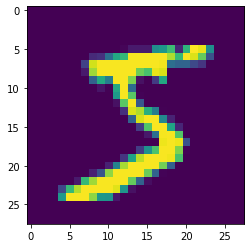

In [6]:
#Show the image as a picture
plt.imshow(X_train[0])

In [7]:
#Reshape the data to fit the model
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
#Build the CNN model
model = Sequential()
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))#Convolution layer to extract features from the input image, and create 64 channels of ReLu 3x3 convolved features (NOTE: Rectifier Linear Unit aka (ReLu))
model.add(Conv2D(32, kernel_size=3, activation='relu'))#Convolution layer to extract features from the input image, and create 32 channels of ReLu 3x3 convolved features
model.add(Flatten())#Flattening  layer makes the image a linear array or 1D Array or 1D Vector to feed into and connect with the neural network
model.add(Dense(10, activation='softmax'))# The neural network last layer with 10 neurons and activation function softmax, 10 neurons used because we have 10 labels


In [14]:
#Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 155s 3ms/step - loss: 0.2983 - accuracy: 0.9508 - val_loss: 0.0862 - val_accuracy: 0.9742s: 0.2984 - accuracy: 0.95
Epoch 2/3
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.0771 - val_accuracy: 0.9773
Epoch 3/3
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0898 - val_accuracy: 0.9750


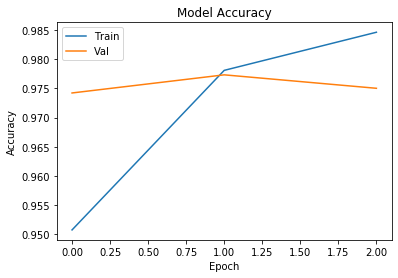

In [18]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [19]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[:25])
predictions

array([[4.81070652e-12, 3.51475241e-15, 2.41960507e-10, 3.08263225e-07,
        8.91934096e-12, 9.31421607e-12, 2.86709006e-17, 9.99999642e-01,
        3.07999777e-08, 6.46514442e-09],
       [8.18298596e-10, 1.69434577e-10, 1.00000000e+00, 4.04575592e-12,
        3.23315057e-17, 3.19121082e-15, 1.62252670e-10, 6.02973374e-16,
        3.00915681e-11, 4.11906233e-17],
       [7.17739067e-06, 8.39146554e-01, 1.11742656e-05, 2.86457833e-07,
        1.59772992e-01, 1.11217560e-05, 1.28539659e-06, 1.37667055e-04,
        9.09973634e-04, 1.66390430e-06],
       [9.99989271e-01, 1.54211383e-11, 5.15794234e-08, 6.13724682e-10,
        1.39210046e-10, 6.63341870e-09, 5.65717357e-07, 1.99307393e-09,
        7.10462746e-06, 2.98829013e-06],
       [2.77307439e-08, 9.53931867e-09, 2.04983835e-10, 4.42715482e-11,
        9.99998331e-01, 1.76796355e-11, 1.54954296e-11, 5.18398935e-11,
        7.60154661e-10, 1.66793961e-06],
       [3.00228152e-07, 9.99324441e-01, 1.91694403e-06, 2.40029205e-08,
   

In [20]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:25])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


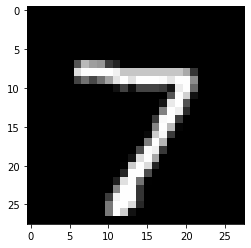

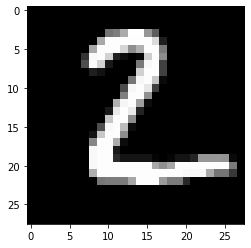

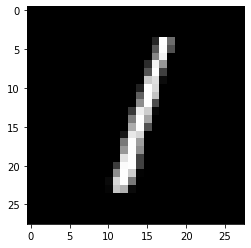

In [ ]:
#Show the first 4 images as pictures
for i in range(0,25):
  image = X_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()